In [ ]:
#####Action1：选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像#####

In [11]:
#导入相关包
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt
import os

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	#print(A-temp)

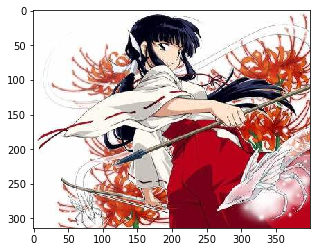

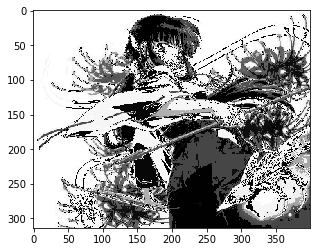

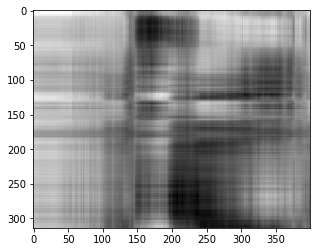

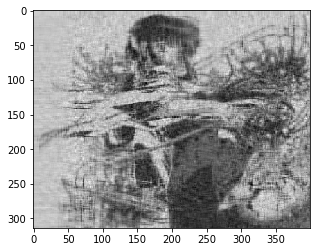

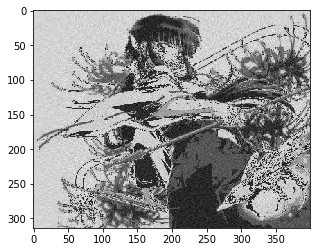

In [12]:
# 加载256色图片
os.getcwd()
os.chdir("D:\\开课吧数据挖掘资料\\第四讲—SVD矩阵分解以及基于内容的推荐\\作业\\")
image = Image.open('./kikyo.jpg') 
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

image = Image.open('./kikyo2.bmp') 
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 3)
get_image_feature(s, 30)
get_image_feature(s, 150)

In [22]:
#####Action 3:使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=? 数据集：three_kingdoms.txt#####
#导入相关包
import jieba
import os
import utils
from utils import files_processing

# 源文件所在目录
os.getcwd()
os.chdir("D:\\开课吧数据挖掘资料\\第四讲—SVD矩阵分解以及基于内容的推荐\\L4\\word2vec")
source_folder = './three_kingdoms/source'
segment_folder = './three_kingdoms/segment'


# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中
file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
segment_lines(file_list, segment_folder)

# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = './three_kingdoms/segment'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model2 = word2vec.Word2Vec(sentences, size=150, window=5, min_count=5, workers=multiprocessing.cpu_count())
# 保存模型
model2.save('./models/word2Vec.model')

#结果输出
print("-"*25+"曹操TOP20相似性词语输出"+"-"*25)
print(model2.most_similar("曹操", topn=20))

print("-"*25+"曹操+刘备-张飞 相似性词语输出"+"-"*25)  
print(model2.wv.most_similar(positive=['曹操','刘备'], negative=['张飞']))

-------------------------曹操TOP20相似性词语输出-------------------------
[('众将', 0.9853004217147827), ('孙权', 0.9795671105384827), ('叫', 0.9769960045814514), ('先主', 0.9768039584159851), ('书', 0.9767574667930603), ('常', 0.9754077792167664), ('华佗', 0.9739283323287964), ('往', 0.9735777974128723), ('施礼', 0.9730747938156128), ('飘然', 0.9730491042137146), ('操指', 0.9726709723472595), ('朵思', 0.9723936319351196), ('关公', 0.9723499417304993), ('报', 0.9717515110969543), ('卓', 0.9716107249259949), ('袁本初', 0.9715008735656738), ('玄德急', 0.9714368581771851), ('门吏', 0.9710877537727356), ('面目', 0.9709305763244629), ('实告', 0.9709289073944092)]
-------------------------曹操+刘备-张飞 相似性词语输出-------------------------
[('丞相', 0.9887875318527222), ('吾', 0.9842771887779236), ('孔明笑', 0.9836519360542297), ('皆曰', 0.9829628467559814), ('叹', 0.9827214479446411), ('此', 0.9824765920639038), ('何人', 0.9821261763572693), ('臣', 0.9809134006500244), ('如之何', 0.9809051156044006), ('何出', 0.9807426333427429)]


D:\anacoda\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
